In [1]:
# import all required libaries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
irisdf = pd.read_csv("iris.csv")
#first 5 dataset
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

#last 5 dataset 
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:

#description of dataset
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Dimension of data set
irisdf.shape

(150, 6)

In [6]:
irisdf.size


900

In [7]:
#check for values of each species whether its balanced or imbalanced
irisdf['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: ylabel='count'>

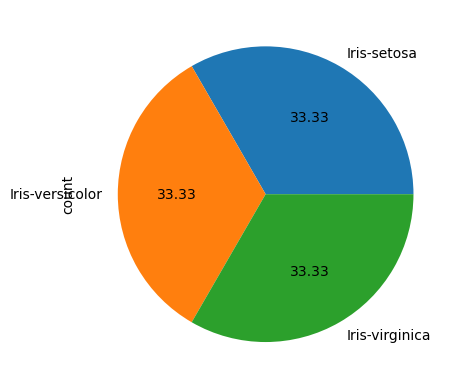

In [8]:
# Visualization in form of pie chart
irisdf['Species'].value_counts().plot(kind='pie',autopct='%.2f')

In [9]:
#Check if any null values is present in give dataset 
irisdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Check for duplicate values
duplicate_count = irisdf.duplicated().sum()
print(duplicate_count)  

0


Exploratory Data Analysis

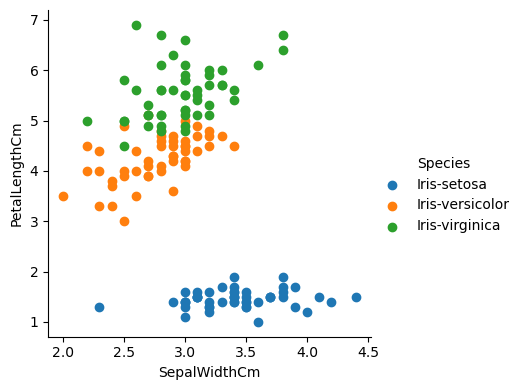

In [11]:
#Scatter Plot to  visualize the datset 
sns.FacetGrid(irisdf,hue='Species',height=4).map(plt.scatter,"SepalWidthCm" , "PetalLengthCm").add_legend()


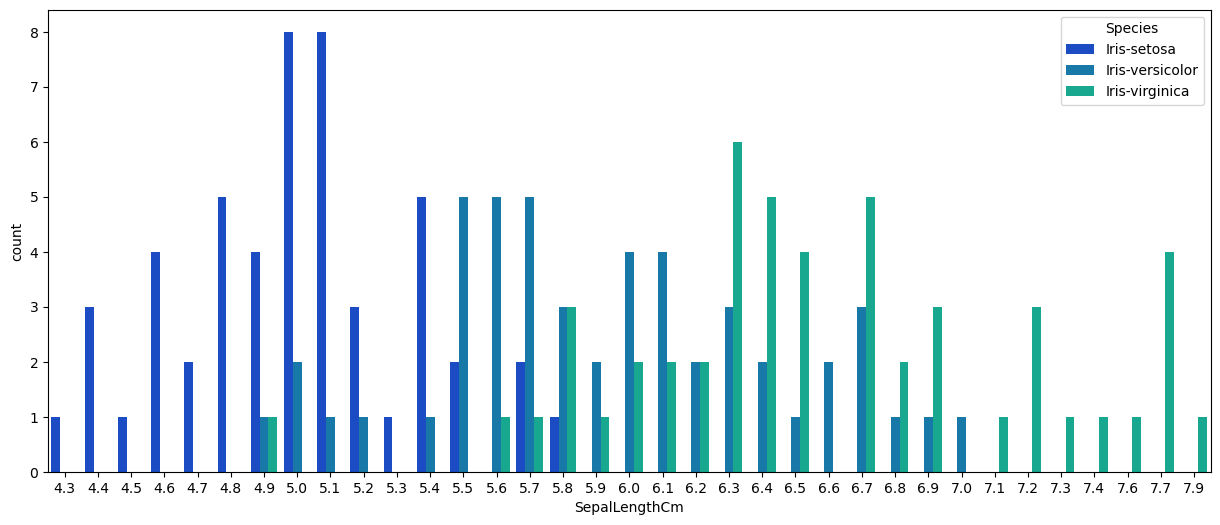

In [12]:

plt.figure(figsize =(15,6))
sns.countplot(x='SepalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'winter')
plt.show()

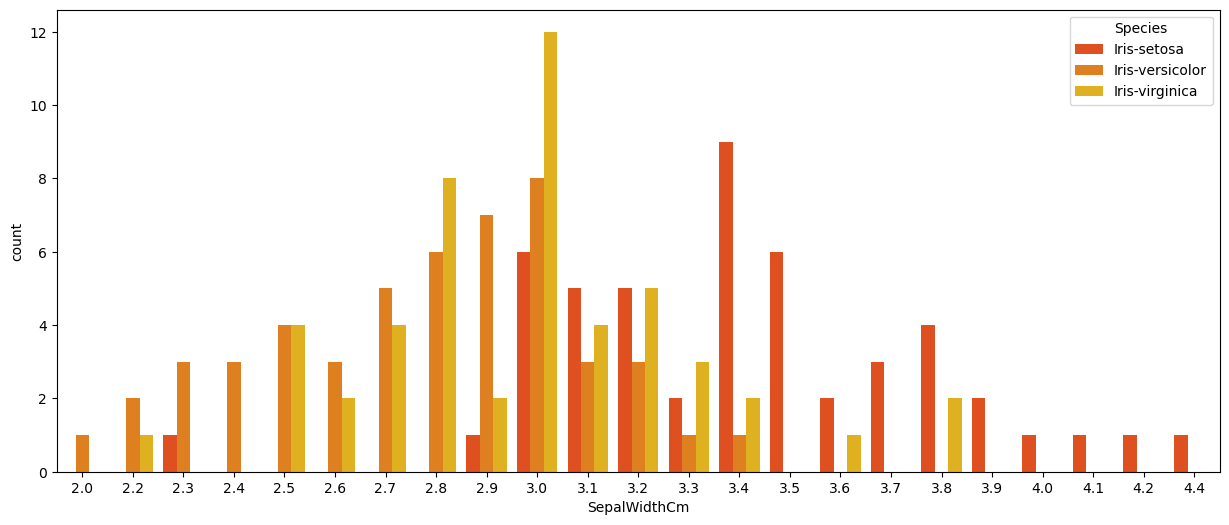

In [13]:
plt.figure(figsize =(15,6))
sns.countplot(x='SepalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'autumn')
plt.show()

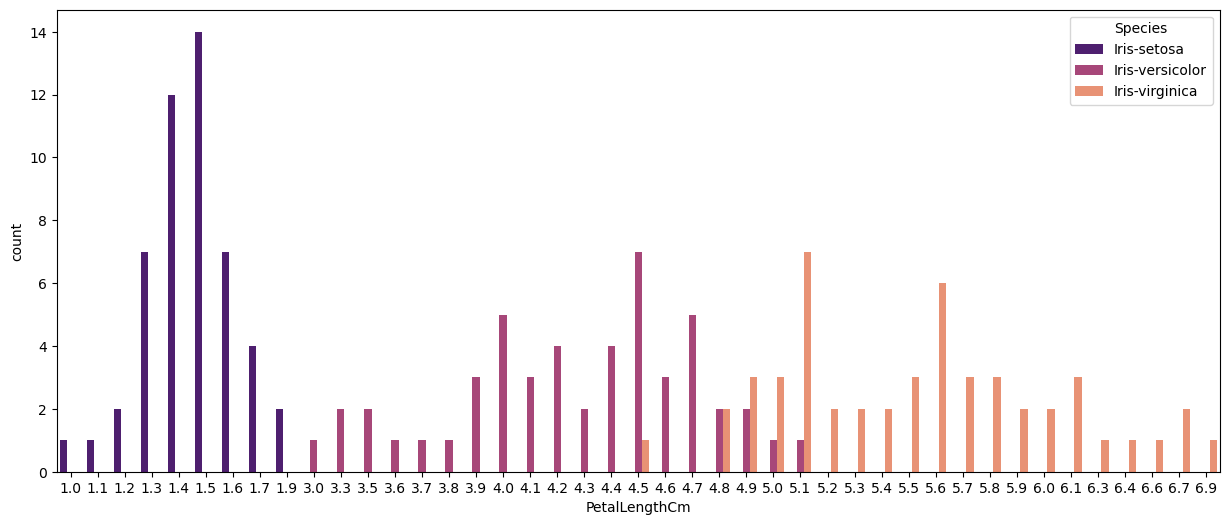

In [14]:

plt.figure(figsize =(15,6))
sns.countplot(x='PetalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'magma')
plt.show()

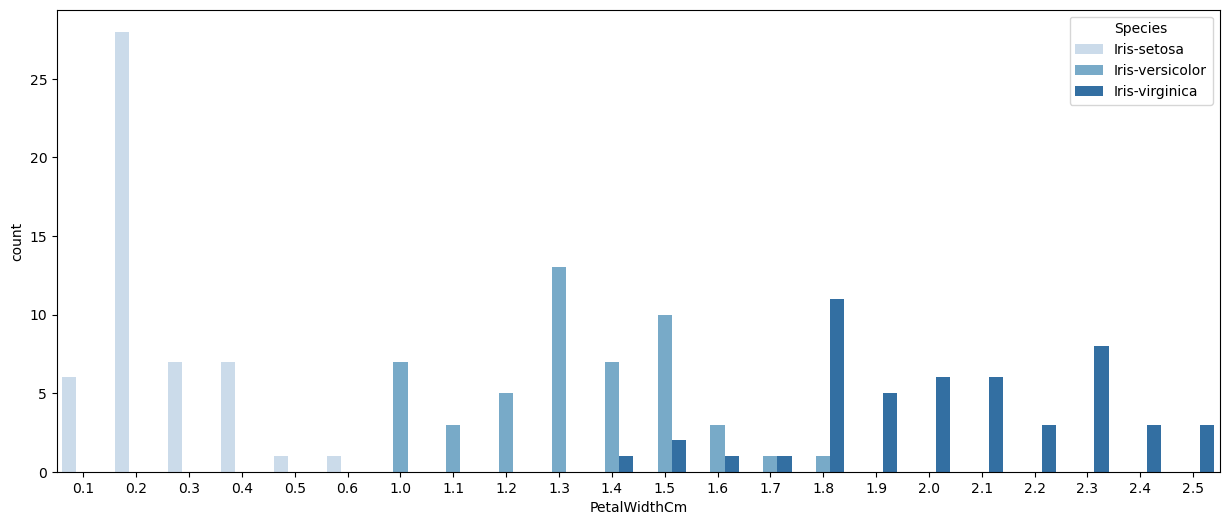

In [15]:
plt.figure(figsize =(15,6))
sns.countplot(x='PetalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'Blues')
plt.show()

In [28]:
irisdf.corr()

<bound method DataFrame.corr of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto